In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf




In [14]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Change directory to where your file is located
path_to_file = ("https://drive.google.com/uc?id=1gOr-rSQ3wCeEDbYu_HF0_NvCJO0L9Uo4&export=download")

# Read the CSV file into a DataFrame
data = pd.read_csv(path_to_file)

# Display the first few rows of the DataFrame
data.head()


Mounted at /content/drive


,Unnamed: 0,UNITID,STABBR,HIGHDEG,CONTROL,ADM_RATE_ALL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,COMPL_RPY_3YR_RT
0,0,100654,AL,4,1,0.716006,21924.0,10024.0,18634.0,39059.0,0.429326
1,1,100663,AL,4,1,0.885352,26248.0,8568.0,20400.0,50907.0,0.618270
2,3,100706,AL,4,1,0.736724,24869.0,11488.0,23884.0,56901.0,0.680887
3,4,100724,AL,4,1,0.979913,21938.0,11068.0,19396.0,34018.0,0.366038
4,5,100751,AL,4,1,0.789043,31050.0,11620.0,31090.0,56118.0,0.711801


In [15]:
clean_df = data.drop(columns="STABBR", axis =1)
clean_df.head()

,Unnamed: 0,UNITID,HIGHDEG,CONTROL,ADM_RATE_ALL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,COMPL_RPY_3YR_RT
0,0,100654,4,1,0.716006,21924.0,10024.0,18634.0,39059.0,0.429326
1,1,100663,4,1,0.885352,26248.0,8568.0,20400.0,50907.0,0.618270
2,3,100706,4,1,0.736724,24869.0,11488.0,23884.0,56901.0,0.680887
3,4,100724,4,1,0.979913,21938.0,11068.0,19396.0,34018.0,0.366038
4,5,100751,4,1,0.789043,31050.0,11620.0,31090.0,56118.0,0.711801


In [ ]:
clean_df['chance_payoff'] = data['COMPL_RPY_3YR_RT'].apply(lambda x: 1 if x > 0.8 else 0)
clean_df.head()

,Unnamed: 0,UNITID,HIGHDEG,CONTROL,ADM_RATE_ALL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,COMPL_RPY_3YR_RT,chance_payoff
0,0,100654,4,1,0.716006,21924.0,10024.0,18634.0,39059.0,0.429326,0
1,1,100663,4,1,0.885352,26248.0,8568.0,20400.0,50907.0,0.618270,0
2,3,100706,4,1,0.736724,24869.0,11488.0,23884.0,56901.0,0.680887,0
3,4,100724,4,1,0.979913,21938.0,11068.0,19396.0,34018.0,0.366038,0
4,5,100751,4,1,0.789043,31050.0,11620.0,31090.0,56118.0,0.711801,0


In [ ]:
y = clean_df["chance_payoff"]
X = clean_df.drop(columns=["chance_payoff"],axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
input_num = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=input_num))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=6, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 66        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 115 (460.00 Byte)
Trainable params: 115 (460.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
38/38 [==============================] - 4s 2ms/step - loss: 0.5977 - accuracy: 0.7417
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.8117
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8450
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8558
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8608
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8642
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8733
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8725
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8775
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8817
Epoch 11/

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - loss: 0.0186 - accuracy: 0.9975 - 479ms/epoch - 37ms/step
Loss: 0.01864471100270748, Accuracy: 0.9975062608718872


<Axes: >

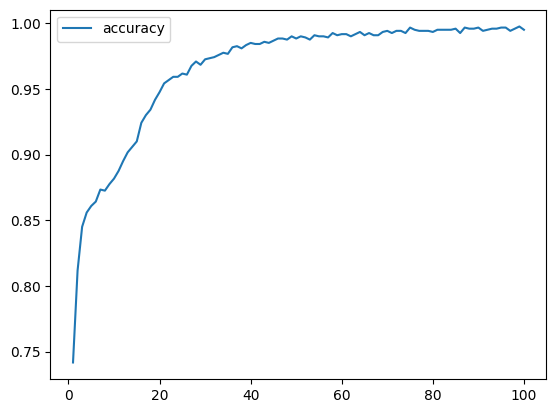

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
